In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('employee_salary_csv')
df.head(10)

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
0,850297,Ms.,Shawna,W,Buck,F,shawna.buck@gmail.com,Rosario Buck,Keisha Buck,Hendricks,...,222-11-7603,702-771-7149,Las Vegas,Clark,Las Vegas,NV,89128,West,swbuck,ja8?k3BTF^]o@<&
1,304721,Mr.,Nathaniel,Z,Burke,M,nathaniel.burke@walmart.com,Derrick Burke,Phoebe Burke,Pugh,...,550-99-9897,231-765-6923,Irons,Lake,Irons,MI,49644,Midwest,nzburke,tPA@4Wh9Ja$+Ln
2,412317,Drs.,Elisabeth,W,Foster,F,elisabeth.foster@gmail.com,Irwin Foster,Janie Foster,Delaney,...,215-91-0004,270-749-4774,Lexington,Fayette,Lexington,KY,40501,South,ewfoster,5D.B4IGNkWJfG<~
3,621375,Mrs.,Briana,C,Lancaster,F,briana.lancaster@yahoo.com,Jeffrey Lancaster,Shelby Lancaster,Weiss,...,534-71-1053,219-623-8216,Munster,Lake,Munster,IN,46321,Midwest,bclancaster,I%?JDM;pW
4,787549,Hon.,Estella,L,Potter,F,estella.potter@gmail.com,Booker Potter,Katelyn Potter,Pate,...,644-29-6396,907-677-8486,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,elpotter,j4jkEXfC&Rh
5,520092,Mr.,Lamont,L,Woods,M,lamont.woods@hotmail.com,Ignacio Woods,Beulah Woods,Trujillo,...,037-74-2595,236-597-8196,Purcellville,Loudoun,Purcellville,VA,20134,South,llwoods,8tf/YU}>s
6,795934,Ms.,Melinda,L,Lopez,F,melinda.lopez@hotmail.com,Leroy Lopez,Edna Lopez,Carter,...,541-83-6362,210-396-1493,Stowell,Chambers,Stowell,TX,77661,South,mllopez,hf*&Gcb[
7,159108,Mrs.,Shanna,U,Silva,F,shanna.silva@gmail.com,Eliseo Silva,Minnie Silva,Callahan,...,673-48-7003,236-373-6712,Herndon,Fairfax,Herndon,VA,20171,South,susilva,oudj2Bq4vc2_{PU
8,330816,Ms.,Jasmine,J,Freeman,F,jasmine.freeman@gmail.com,Hans Freeman,Renee Freeman,Mcbride,...,600-99-8437,423-796-1535,Ocoee,Polk,Ocoee,TN,37361,South,jjfreeman,Q.8<Q>K*H\*6f
9,532002,Ms.,Madge,V,Sargent,F,madge.sargent@aol.com,Luke Sargent,Judy Sargent,Herrera,...,177-86-7347,217-910-0644,Springfield,Sangamon,Springfield,IL,62712,Midwest,mvsargent,bc\&B81h


In [4]:
df.shape

(1000, 37)

In [5]:
df.dtypes

Emp ID                      int64
Name Prefix                object
First Name                 object
Middle Initial             object
Last Name                  object
Gender                     object
E Mail                     object
Father's Name              object
Mother's Name              object
Mother's Maiden Name       object
Date of Birth              object
Time of Birth              object
Age in Yrs.               float64
Weight in Kgs.              int64
Date of Joining            object
Quarter of Joining         object
Half of Joining            object
Year of Joining             int64
Month of Joining            int64
Month Name of Joining      object
Short Month                object
Day of Joining              int64
DOW of Joining             object
Short DOW                  object
Age in Company (Years)    float64
Salary                      int64
Last % Hike                object
SSN                        object
Phone No.                  object
Place Name    

In [6]:
df.columns

Index(['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name',
       'Gender', 'E Mail', 'Father's Name', 'Mother's Name',
       'Mother's Maiden Name', 'Date of Birth', 'Time of Birth', 'Age in Yrs.',
       'Weight in Kgs.', 'Date of Joining', 'Quarter of Joining',
       'Half of Joining', 'Year of Joining', 'Month of Joining',
       'Month Name of Joining', 'Short Month', 'Day of Joining',
       'DOW of Joining', 'Short DOW', 'Age in Company (Years)', 'Salary',
       'Last % Hike', 'SSN', 'Phone No. ', 'Place Name', 'County', 'City',
       'State', 'Zip', 'Region', 'User Name', 'Password'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Emp ID                  1000 non-null   int64  
 1   Name Prefix             1000 non-null   object 
 2   First Name              1000 non-null   object 
 3   Middle Initial          1000 non-null   object 
 4   Last Name               1000 non-null   object 
 5   Gender                  1000 non-null   object 
 6   E Mail                  1000 non-null   object 
 7   Father's Name           1000 non-null   object 
 8   Mother's Name           1000 non-null   object 
 9   Mother's Maiden Name    1000 non-null   object 
 10  Date of Birth           1000 non-null   object 
 11  Time of Birth           1000 non-null   object 
 12  Age in Yrs.             1000 non-null   float64
 13  Weight in Kgs.          1000 non-null   int64  
 14  Date of Joining         1000 non-null   o

In [8]:
df.isnull().any()

Emp ID                    False
Name Prefix               False
First Name                False
Middle Initial            False
Last Name                 False
Gender                    False
E Mail                    False
Father's Name             False
Mother's Name             False
Mother's Maiden Name      False
Date of Birth             False
Time of Birth             False
Age in Yrs.               False
Weight in Kgs.            False
Date of Joining           False
Quarter of Joining        False
Half of Joining           False
Year of Joining           False
Month of Joining          False
Month Name of Joining     False
Short Month               False
Day of Joining            False
DOW of Joining            False
Short DOW                 False
Age in Company (Years)    False
Salary                    False
Last % Hike               False
SSN                       False
Phone No.                 False
Place Name                False
County                    False
City    

In [9]:
df.describe()

,Emp ID,Age in Yrs.,Weight in Kgs.,Year of Joining,Month of Joining,Day of Joining,Age in Company (Years),Salary,Zip
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,549097.583000,40.377250,59.409000,2006.992000,6.415000,16.481000,10.093720,120288.528000,48698.499000
std,264810.879315,11.107729,13.900322,8.565588,3.428488,8.831514,8.568863,45178.339916,27396.021481
min,114425.000000,21.040000,40.000000,1980.000000,1.000000,1.000000,0.000000,40040.000000,1002.000000
25%,307757.000000,30.925000,49.000000,2002.000000,4.000000,9.000000,3.152500,82122.000000,25421.750000
50%,543073.000000,40.730000,57.000000,2009.000000,6.000000,17.000000,7.815000,119409.000000,47416.500000
75%,788450.250000,49.852500,68.000000,2014.000000,10.000000,24.000000,15.465000,159109.000000,71101.000000
max,999475.000000,59.980000,90.000000,2017.000000,12.000000,31.000000,37.570000,199943.000000,99791.000000


In [10]:
dfcorr=df.corr()
df

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
0,850297,Ms.,Shawna,W,Buck,F,shawna.buck@gmail.com,Rosario Buck,Keisha Buck,Hendricks,...,222-11-7603,702-771-7149,Las Vegas,Clark,Las Vegas,NV,89128,West,swbuck,ja8?k3BTF^]o@<&
1,304721,Mr.,Nathaniel,Z,Burke,M,nathaniel.burke@walmart.com,Derrick Burke,Phoebe Burke,Pugh,...,550-99-9897,231-765-6923,Irons,Lake,Irons,MI,49644,Midwest,nzburke,tPA@4Wh9Ja$+Ln
2,412317,Drs.,Elisabeth,W,Foster,F,elisabeth.foster@gmail.com,Irwin Foster,Janie Foster,Delaney,...,215-91-0004,270-749-4774,Lexington,Fayette,Lexington,KY,40501,South,ewfoster,5D.B4IGNkWJfG<~
3,621375,Mrs.,Briana,C,Lancaster,F,briana.lancaster@yahoo.com,Jeffrey Lancaster,Shelby Lancaster,Weiss,...,534-71-1053,219-623-8216,Munster,Lake,Munster,IN,46321,Midwest,bclancaster,I%?JDM;pW
4,787549,Hon.,Estella,L,Potter,F,estella.potter@gmail.com,Booker Potter,Katelyn Potter,Pate,...,644-29-6396,907-677-8486,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,elpotter,j4jkEXfC&Rh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,568435,Ms.,Bonnie,K,Baker,F,bonnie.baker@bp.com,Edwardo Baker,Pauline Baker,Robinson,...,064-02-6162,262-696-9171,Mukwonago,Waukesha,Mukwonago,WI,53149,Midwest,bkbaker,a?Co:/r;nu_wTQ
996,597409,Mr.,Luke,S,Turner,M,luke.turner@charter.net,Javier Turner,Nicole Turner,Sykes,...,056-02-8240,231-629-0498,Freeport,Barry,Freeport,MI,49325,Midwest,lsturner,7n5@64VC7|
997,359608,Hon.,Eva,S,Holman,F,eva.holman@hotmail.com,Coy Holman,Haley Holman,Boyle,...,343-11-1935,209-912-6705,Turlock,Stanislaus,Turlock,CA,95381,West,esholman,DG<<<e}*WgD<U
998,803426,Mrs.,Maritza,H,Christian,F,maritza.christian@microsoft.com,Dion Christian,Stephanie Christian,Mooney,...,336-11-5030,203-224-9056,Stamford,Fairfield,Stamford,CT,6910,Northeast,mhchristian,Krs@#TnM


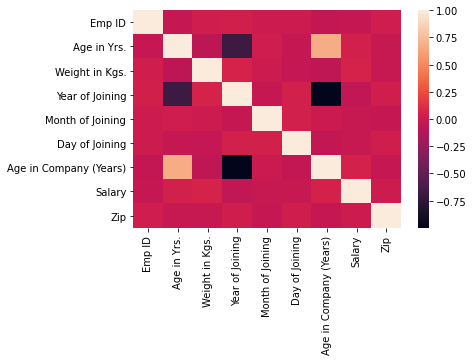

In [11]:
sns.heatmap(dfcorr)


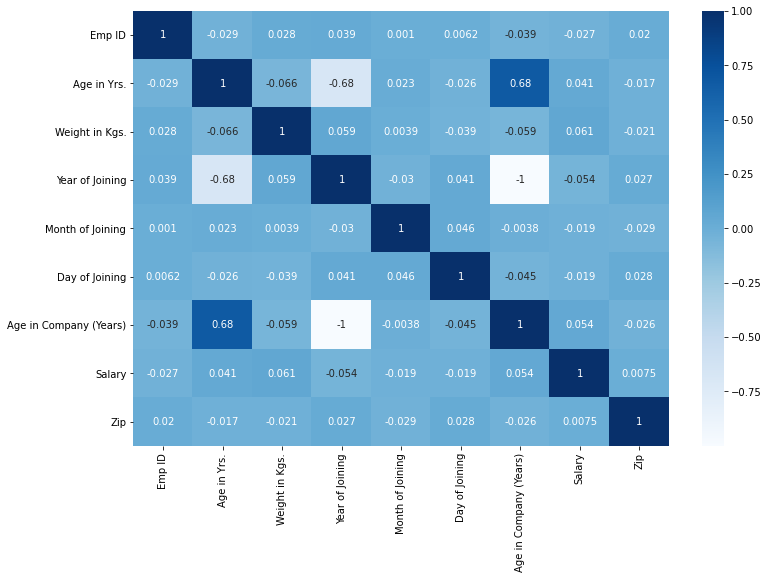

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcorr,cmap='Blues',annot=True)

# visualization process

In [13]:
df['Salary'].value_counts()

173372    2
136817    2
174027    2
66212     1
115356    1
         ..
60737     1
175424    1
197951    1
53311     1
186371    1
Name: Salary, Length: 997, dtype: int64

In [14]:
import matplotlib.pyplot as plt

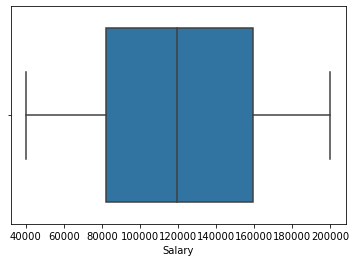

In [15]:
sns.boxplot(df['Salary'])

In [16]:
df['Age in Yrs.'].value_counts()

22.39    3
33.44    3
50.46    3
58.10    3
54.27    3
        ..
51.31    1
23.47    1
55.29    1
45.87    1
23.25    1
Name: Age in Yrs., Length: 889, dtype: int64

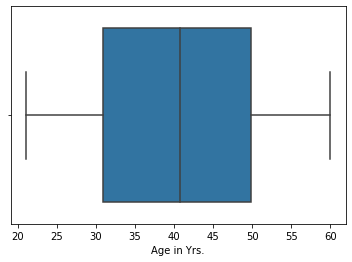

In [17]:
sns.boxplot(df['Age in Yrs.'])

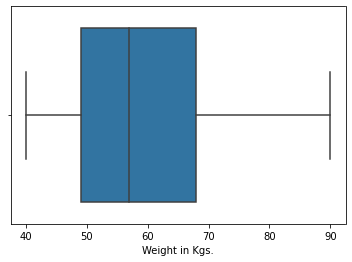

In [18]:
sns.boxplot(df['Weight in Kgs.'])

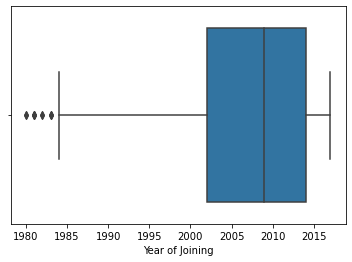

In [19]:
sns.boxplot(df['Year of Joining'])

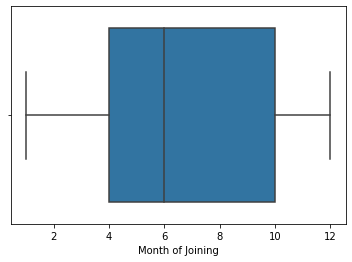

In [20]:
sns.boxplot(df['Month of Joining'])

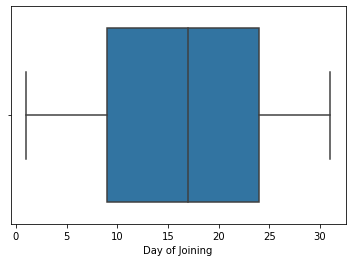

In [21]:
sns.boxplot(df['Day of Joining'])

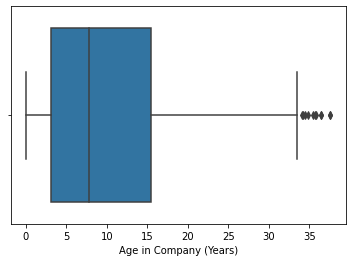

In [22]:
sns.boxplot(df['Age in Company (Years)'])

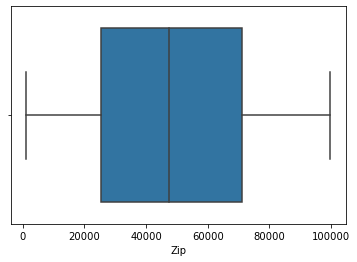

In [23]:
sns.boxplot(df['Zip'])

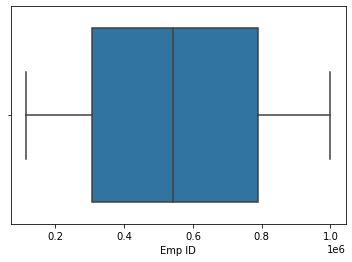

In [24]:
sns.boxplot(df['Emp ID'])

# checking distribution of skewness

In [25]:
import seaborn as sns
import numpy as ny
import matplotlib.pyplot as plt

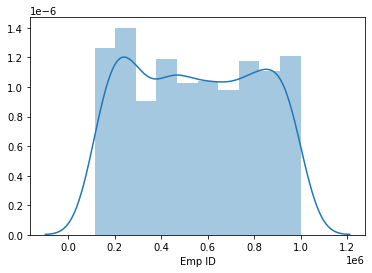

In [26]:
sns.distplot(df['Emp ID'])
plt.show()

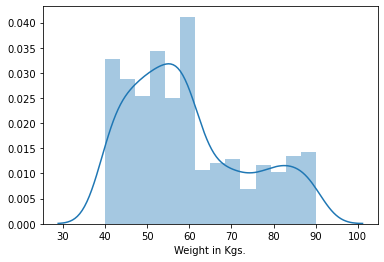

In [27]:
sns.distplot(df['Weight in Kgs.'])
plt.show()

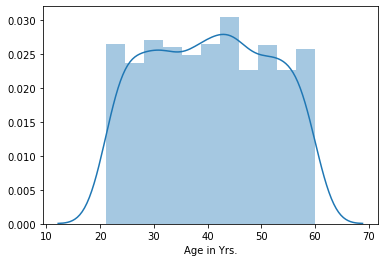

In [28]:
sns.distplot(df['Age in Yrs.'])
plt.show()

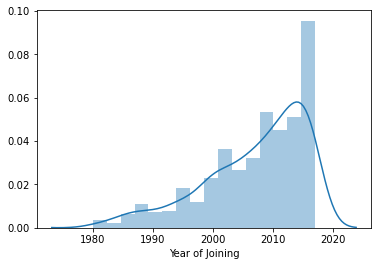

In [29]:
sns.distplot(df['Year of Joining'])
plt.show()

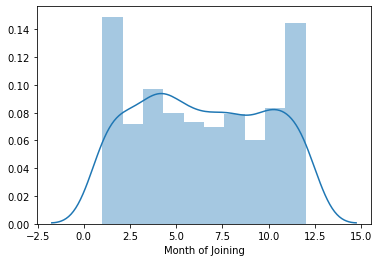

In [30]:
sns.distplot(df['Month of Joining'])
plt.show()

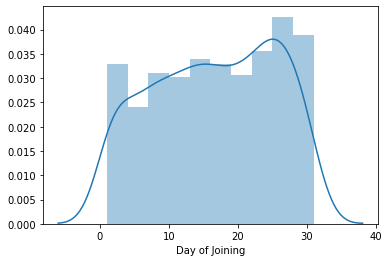

In [31]:
sns.distplot(df['Day of Joining'])
plt.show()

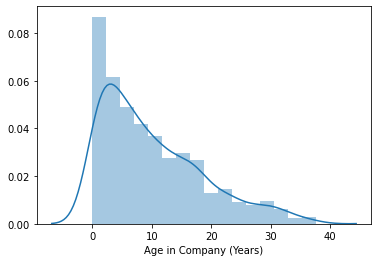

In [32]:
sns.distplot(df['Age in Company (Years)'])
plt.show()

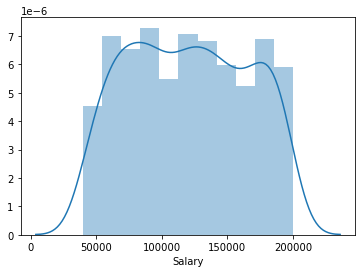

In [33]:
sns.distplot(df['Salary'])
plt.show()

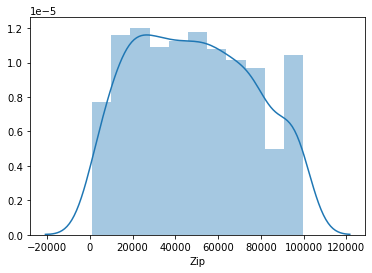

In [34]:
sns.distplot(df['Zip'])
plt.show()

# dropping the columns

In [35]:
df.columns

Index(['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name',
       'Gender', 'E Mail', 'Father's Name', 'Mother's Name',
       'Mother's Maiden Name', 'Date of Birth', 'Time of Birth', 'Age in Yrs.',
       'Weight in Kgs.', 'Date of Joining', 'Quarter of Joining',
       'Half of Joining', 'Year of Joining', 'Month of Joining',
       'Month Name of Joining', 'Short Month', 'Day of Joining',
       'DOW of Joining', 'Short DOW', 'Age in Company (Years)', 'Salary',
       'Last % Hike', 'SSN', 'Phone No. ', 'Place Name', 'County', 'City',
       'State', 'Zip', 'Region', 'User Name', 'Password'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Emp ID                  1000 non-null   int64  
 1   Name Prefix             1000 non-null   object 
 2   First Name              1000 non-null   object 
 3   Middle Initial          1000 non-null   object 
 4   Last Name               1000 non-null   object 
 5   Gender                  1000 non-null   object 
 6   E Mail                  1000 non-null   object 
 7   Father's Name           1000 non-null   object 
 8   Mother's Name           1000 non-null   object 
 9   Mother's Maiden Name    1000 non-null   object 
 10  Date of Birth           1000 non-null   object 
 11  Time of Birth           1000 non-null   object 
 12  Age in Yrs.             1000 non-null   float64
 13  Weight in Kgs.          1000 non-null   int64  
 14  Date of Joining         1000 non-null   o

In [37]:
df.drop(['Name Prefix','First Name','Last Name'],axis=1,inplace=True)

In [47]:
df.drop(['Middle Initial','Password','User Name'],axis=1,inplace=True)

In [48]:
df.drop(['State','City','County'],axis=1,inplace=True)

In [51]:
df.drop(['Place Name','SSN'],axis=1,inplace=True)

In [52]:
df.drop(['Last % Hike','Short DOW', 'DOW of Joining'],axis=1,inplace=True)

In [53]:
df.drop(['Short Month','Month Name of Joining', 'Half of Joining'],axis=1,inplace=True)

In [54]:
df.drop(['Quarter of Joining','Date of Joining', 'Time of Birth'],axis=1,inplace=True)

In [56]:
df.head()

,Emp ID,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,Date of Birth,Age in Yrs.,Weight in Kgs.,Year of Joining,Month of Joining,Day of Joining,Age in Company (Years),Salary,Phone No.,Zip,Region
0,850297,F,shawna.buck@gmail.com,Rosario Buck,Keisha Buck,Hendricks,12/12/1971,45.66,44,2010,12,18,6.61,119090,702-771-7149,89128,West
1,304721,M,nathaniel.burke@walmart.com,Derrick Burke,Phoebe Burke,Pugh,10/31/1993,23.76,52,2017,4,25,0.26,117991,231-765-6923,49644,Midwest
2,412317,F,elisabeth.foster@gmail.com,Irwin Foster,Janie Foster,Delaney,11/26/1994,22.68,42,2017,3,27,0.34,161045,270-749-4774,40501,South
3,621375,F,briana.lancaster@yahoo.com,Jeffrey Lancaster,Shelby Lancaster,Weiss,11/24/1975,41.70,43,2003,2,25,14.43,142616,219-623-8216,46321,Midwest
4,787549,F,estella.potter@gmail.com,Booker Potter,Katelyn Potter,Pate,3/13/1995,22.39,58,2016,10,11,0.79,135706,907-677-8486,99709,West


In [58]:
df.dtypes

Emp ID                      int64
Gender                     object
E Mail                     object
Father's Name              object
Mother's Name              object
Mother's Maiden Name       object
Date of Birth              object
Age in Yrs.               float64
Weight in Kgs.              int64
Year of Joining             int64
Month of Joining            int64
Day of Joining              int64
Age in Company (Years)    float64
Salary                      int64
Phone No.                  object
Zip                         int64
Region                     object
dtype: object

In [61]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#encoding the gender column
df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1].values)

#encoding the E mail column
df.iloc[:,2] = labelencoder.fit_transform(df.iloc[:,2].values)
df.iloc[:,3] = labelencoder.fit_transform(df.iloc[:,3].values)
df.iloc[:,4] = labelencoder.fit_transform(df.iloc[:,4].values)
df.iloc[:,5] = labelencoder.fit_transform(df.iloc[:,5].values)
df.iloc[:,6] = labelencoder.fit_transform(df.iloc[:,6].values)
df.iloc[:,14] = labelencoder.fit_transform(df.iloc[:,14].values)
df.iloc[:,16] = labelencoder.fit_transform(df.iloc[:,16].values)


In [63]:
print(df['Gender'].unique())
print(df['E Mail'].unique())
print(df['Region'].unique())
print(df['Phone No'].unique())

[0 1]
[879 730 300 118 335 554 685 873 452 632  95 804  46 672  88 186 951 947
 993 135  15 663  52 926 488 525 251  10  71 464 865 428 642  79 645 851
  99 647 786 628 938 852 834 140 945 572 180 507 582 812 595 518 669 381
 695 138 100 296  18 323 364 924 168 382 256 197 776 972 210 203 115 697
 331 775 355 660 970 275 703   3  80 731 741 486 114 137  50 743 797 462
 925 267 750 216 733 638 259 611 455 198 269 913 465 310 900 839 394 497
  11 723 961 110 313 998 928  56 148 170 817 117 739 295 189 844 858  21
 116 260 505 662 212 578 930  23 648 986 264 545 373 665 426 810 884 483
 281  90 997 822 143 892 559 330 134 314 863 833 950 470 429 443 162 508
  47 768 401   9 442 787 235 522 419 453 119 857 932 221 336 567 962 450
 439 122 372  59 622 472 716  38  62  35 855 535 912 395 232 496 270 101
 109 823 541 566 478 568 454 624 274 712 255 161 615 614  13 448 519 241
 517 279 929 169 585 172 704 696 447 896  97 242 219  40 876 836 527 261
 315 556 463 273 357 780  25 474 908 761 606 

KeyError: 'Phone No'

In [64]:
df.dtypes

Emp ID                      int64
Gender                      int64
E Mail                      int64
Father's Name               int32
Mother's Name               int32
Mother's Maiden Name        int32
Date of Birth               int32
Age in Yrs.               float64
Weight in Kgs.              int64
Year of Joining             int64
Month of Joining            int64
Day of Joining              int64
Age in Company (Years)    float64
Salary                      int64
Phone No.                   int32
Zip                         int64
Region                      int32
dtype: object

# removing outliers

In [65]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.13798244, 1.01816496, 1.31462722, ..., 1.62986062, 1.47648194,
        1.49185658],
       [0.92329614, 0.98215912, 0.79847582, ..., 0.00173205, 0.03452962,
        1.32296716],
       [0.51678022, 1.01816496, 0.69108862, ..., 0.60448603, 0.29937197,
        0.553582  ],
       ...,
       [0.71592375, 1.01816496, 0.55598859, ..., 1.24880926, 1.70484097,
        1.49185658],
       [0.96089586, 1.01816496, 0.55252448, ..., 1.65757345, 1.52611243,
        0.38469258],
       [0.45534656, 1.01816496, 0.9820733 , ..., 1.27998619, 0.91524389,
        0.553582  ]])

In [66]:
threshold=3
print(np.where(z>3))

(array([594, 594, 606, 621, 621, 684, 684, 895, 999, 999], dtype=int64), array([ 9, 12,  9,  9, 12,  9, 12,  9,  9, 12], dtype=int64))


In [67]:
z[13][6]

1.172191656207105

In [68]:
z[40][4]

0.6633757909868584

In [69]:
df_new=df[(z<3).all(axis=1)]

In [70]:
df_new

,Emp ID,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,Date of Birth,Age in Yrs.,Weight in Kgs.,Year of Joining,Month of Joining,Day of Joining,Age in Company (Years),Salary,Phone No.,Zip,Region
0,850297,0,879,810,510,262,260,45.66,44,2010,12,18,6.61,119090,970,89128,3
1,304721,1,730,249,786,476,130,23.76,52,2017,4,25,0.26,117991,500,49644,0
2,412317,0,300,450,419,153,211,22.68,42,2017,3,27,0.34,161045,674,40501,2
3,621375,0,118,497,882,608,201,41.70,43,2003,2,25,14.43,142616,420,46321,0
4,787549,0,335,95,495,450,432,22.39,58,2016,10,11,0.79,135706,992,99709,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,172440,1,183,867,795,252,297,28.61,73,2017,6,21,0.10,84585,91,91051,3
995,568435,0,107,296,774,498,891,32.01,59,2008,1,7,9.56,72930,633,53149,0
996,597409,1,620,487,753,572,339,30.48,84,2010,3,5,7.40,121949,498,49325,0
997,359608,0,339,206,370,59,954,59.88,50,2001,2,20,16.44,82734,139,95381,3


In [71]:
df.shape

(1000, 17)

In [72]:
df_new.shape

(994, 17)

In [73]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

# scaling the data

In [74]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled=sc.fit_transform(x)

In [75]:
#finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


best_rstate=0
accu=0
for i in range(30,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f"best accuracy {accu*100}found on random_state {best_rstate}")
    

best accuracy 15.394658817630036found on random_state 53


In [76]:
#spliting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=92)

# finding the best model

In [77]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print(f"accuracy={r2score*100}, Cross_val_score = {cvscore*100} $ difference = {(r2score*100)-(cvscore*100)}")

accuracy=9.533978673009901, Cross_val_score = 7.256813413346948 $ difference = 2.2771652596629535


In [78]:
#randomo forestregressor
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print(f"accuracy={r2score*100}, Cross_val_score = {cvscore*100} $ difference = {(r2score*100)-(cvscore*100)}")



accuracy=99.53600434335887, Cross_val_score = 99.0791454520152 $ difference = 0.4568588913436713


In [79]:
#adaBoostRegessor
from sklearn.ensemble import AdaBoostRegressor
ADB=AdaBoostRegressor()
ADB.fit(x_train,y_train)
y_pred=ADB.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5).mean()
print(f"accuracy={r2score*100}, Cross_val_score = {cvscore*100} $ difference = {(r2score*100)-(cvscore*100)}")

accuracy=98.40873812338813, Cross_val_score = 98.53790818701768 $ difference = -0.12917006362954453


In [80]:
#SGDRegressor
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
y_pred=SGD.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGDRegressor(),x_train,y_train,cv=5).mean()
print(f"accuracy={r2score*100}, Cross_val_score = {cvscore*100} $ difference = {(r2score*100)-(cvscore*100)}")

accuracy=-1.225139898845571e+43, Cross_val_score = -1.744734544273478e+42 $ difference = -1.0506664444182231e+43


# hyperparameter tuning

In [81]:
#crearting parameter list to pass Gridsearchcv
parameters = {'max_iter': [500,700,900,1100,1300,1500],
              'alpha': [0.0001,0.001,0.01,1,10,100],
              'penalty':['elasticnet','l1','l2']}

In [82]:
from sklearn.model_selection import GridSearchCV

GCV=GridSearchCV(SGDRegressor(),parameters,cv=5,scoring='r2')
GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_pred=GCV.best_estimator_.predict(x_test)
print('Final accuracy:',r2_score(y_test,GCV_pred)*100)

Final accuracy: -2.969636716468653e+41
